# Обработка изображений

In [1]:
%matplotlib inline

In [31]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
%pwd

'/Users/andrew/learn-opencv/sem_1'

In [4]:
%ls

images/               opencv.pdf            practice.ipynb
OpenCV_CheatSheet.md  opencv.pptx           theory.ipynb


In [32]:
os.makedirs('images', exist_ok=True)

## Чтение и запись изображений

Считываем трёхканальное (`RBB`) изображение:

In [25]:
IMG_PATH = 'images/valle_1.jpeg'

img = cv2.imread(IMG_PATH)
print(f'Image shape:{img.shape}')

Image shape:(1024, 1024, 3)


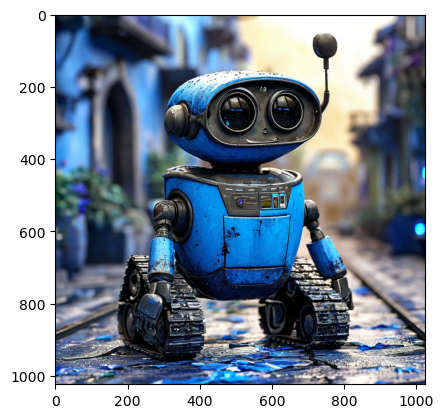

In [26]:
plt.imshow(img)
plt.show()

Считываем `RGB` изображение и сразу переводим его в оттенки серого – `GRAYSCALE` формат. Уменьшим размер картинки до `512x512`:

In [27]:
img = cv2.imread(IMG_PATH, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (512,512))
print(f'Image shape:{img.shape}')

Image shape:(512, 512)


Считываем изображение, затем переводим его в оттенки серого:

In [28]:
img = cv2.imread(IMG_PATH)
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(f'Image shape:{grayscale.shape}')

Image shape:(1024, 1024)


Отобразим картинку:

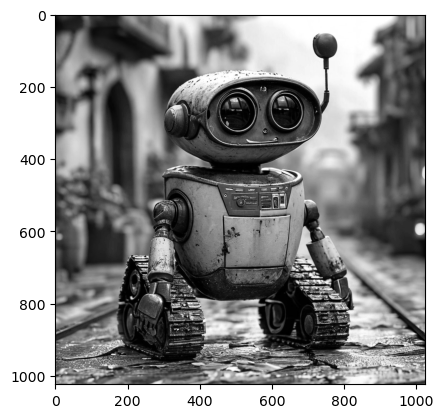

In [9]:
plt.imshow(grayscale, cmap='gray')
plt.show()

Сохраняем картику:

In [10]:
cv2.imwrite('images/valle_grayscale.jpeg', grayscale)

True

Хотим перекрасить определённую область картинки в красный цвет:

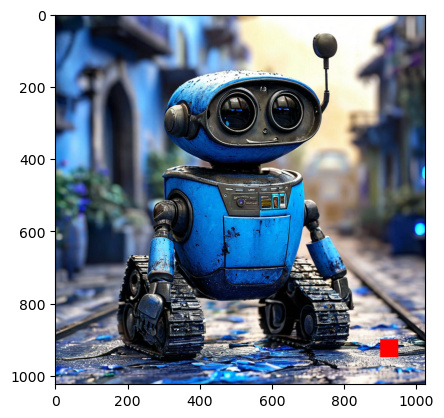

In [11]:
# Задаём область, которую хотим перекрасить 
y1, y2, x1, x2 = 900, 950, 900, 950
# Задаём цвет, в который хотим перекрасить
new_color = (255,0, 0)
img[y1:y2, x1:x2] = new_color
plt.imshow(img)
plt.show()

## Рисование

В OpenCV можно рисовать различные геометрические фигуры на ваших изображениях или просто на фоне. Можно также добавить текст на изображение. 

Всё это делают функции **cv2.line()**, **cv2.circle()**, **cv2.rectangle()**, **cv2.ellipse()**, **cv2.putText()**, у которых одинаковый набор параметров:

- `img`: изображение, на котором рисуем фигуры;
- `color`: цвет фигуры. Для цветной фигуры (BGR) передаём в виде tuple, т.е. (255, 0, 0) - голубой цвет. Для оттенков серого одно значение;
- `thickness`: толщина линии. Значение по умолчанию - 1;
- `lineType`: тип линии



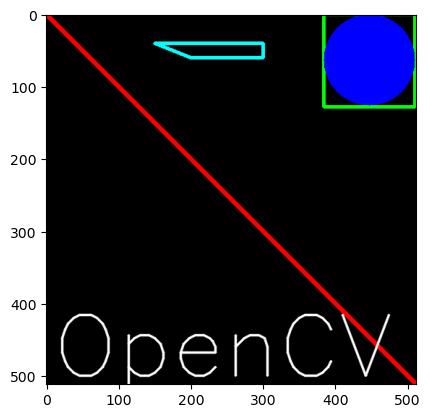

In [13]:
img = np.zeros((512,512,3), np.uint8)
# Draw a diagonal blue line with thickness of 5 px
img = cv2.line(img,(0,0),(511,511),(255,0,0),5)
# draw a green rectangle. we need top-left and bottom-right corner
# of rectangle
img = cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)

# drawing a circle, we need center coordinates and radius
# drawing a circle inside the rectangle above
img = cv2.circle(img,(447,63), 63, (0,0,255), -1)

# drawing polygon
# need to collect these points into an array of shape ROWSx1x2, where ROWS -
# number of vertices, should be of type int32. Drawing a small polygon with 4 vertices of yellow color
pts = np.array([[300,40],[300,60],[200,60],[150,40]], np.int32)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(img,[pts],True,(0,255,255), 4)

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)

plt.imshow(img)
plt.show()

## Размытие изображений

Считываем картинку. Делаем размытие фильтром Гауссом с размером ядра `27x27`. Величина **0** у стандартного отклонения подразумевает автоматическое вычисление по умолчанию:

In [29]:
img = cv2.imread(IMG_PATH)
blurred = cv2.GaussianBlur(img, (27,27), 0)
cv2.imwrite('images/valle_blurred.jpg',blurred)

True

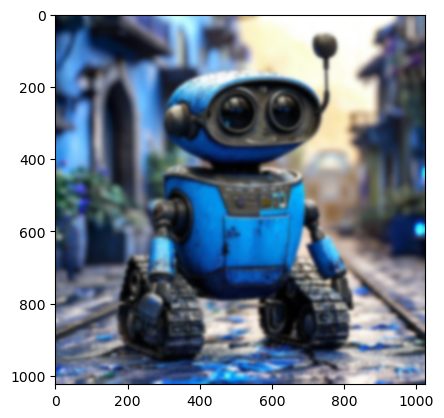

In [13]:
plt.imshow(blurred)
plt.show()

## Пороговая фильтрация

Пороговую фильтрацию можно задать следующим условием: 

$$ 
dst(x, y) =
\begin{cases} 
\text{maxVal}, & \text{если } src(x, y) \geq T \\ 
0, & \text{если } src(x, y) < T 
\end{cases}
$$
где `T` — порог,  `maxVal` — значение для белого цвета.


1. Сначала переводим изображение к одноканальному. 

2. Выбираем пороговое значение `T` и максимальное значение `maxValue`. В нашем случае `T=125`, `maxValue=255`

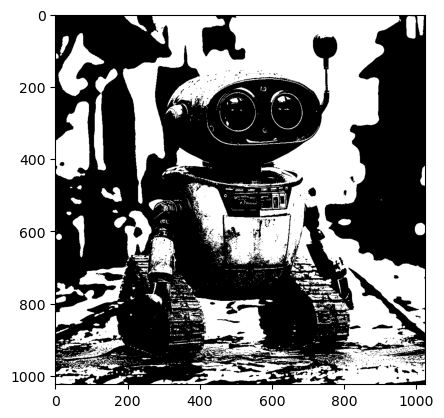

In [14]:
_, thresholded = cv2.threshold(grayscale, 125, 255, cv2.THRESH_BINARY)
cv2.imwrite('images/thresholded_valle.jpeg', thresholded)
plt.imshow(thresholded, cmap='gray')
plt.show()

In [69]:
# посмотрим на уникальные значения пикселей в массиве изображения
# 0, 255 -> бинарная картинка
print(np.unique(thresholded))

[  0 255]


Кроме того, существуют и другие типы пороговой фильтрации. Функция `cv2.threshold` предоставляет несколько вариантов пороговой фильтрации:

1. **Бинарная фильтрация (`cv2.THRESH_BINARY`)**:
    Если значение пикселя выше порога \( T \), оно становится `maxVal`, иначе — 0.

2. **Обратная бинарная фильтрация (`cv2.THRESH_BINARY_INV`)**:
    Противоположная бинарной: пиксели выше порога становятся 0, ниже — `maxVal`.

3. **Транкация (`cv2.THRESH_TRUNC`)**:
    Значения пикселей выше порога обрезаются до \( T \), остальные остаются неизменными.

4. **Порог до нуля (`cv2.THRESH_TOZERO`)**:
    Значения пикселей ниже порога становятся 0, остальные остаются неизменными.

5. **Обратный порог до нуля (`cv2.THRESH_TOZERO_INV`)**:
    Значения пикселей выше порога становятся 0, остальные остаются неизменными.

## Нахождение границ с помощью алгоритма Canny

Устанавливаем два значения порога `threshold1` и `threshold2` для градиентов интесивности пикселей:

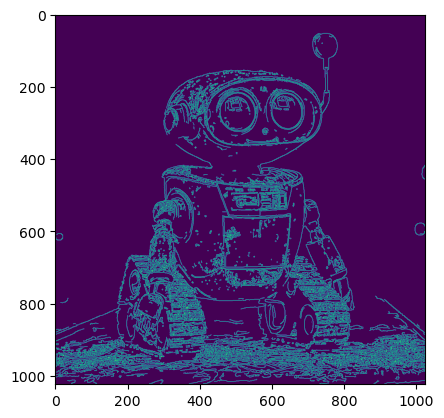

In [15]:
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Применение Canny
edges = cv2.Canny(grayscale, threshold1=100, threshold2=200)

cv2.imwrite('images/edged_valle.jpg', edges)
plt.imshow(edges)
plt.show()

## Геометрические преобразования

<img src="https://gaussian37.github.io/assets/img/vision/concept/image_transformation/9.png" width="700">

### Трансляция
Трансляция - это по сути сдвиг изображения. Если мы знаем величину сдвига в направлении (x,y) для картинки, пусть это будет ($t_{x}$, $t_{y}$), тогда мы можем создать матрицу поворота **M** следующим образом:

\begin{equation}
M = \begin{bmatrix}
1 & 0 & t_{x} \\
0 & 1 & t_{y}
\end{bmatrix}
\end{equation}


Задаём матрицу в виде numpy массива и передаём в качестве параметра функции cv2.warpAffine(). Ниже пример трансляции изображения на величину **100** пикселей вправо по **Ox** и на **50** пикселей вниз по **Oy**:

(1024, 1024, 3)


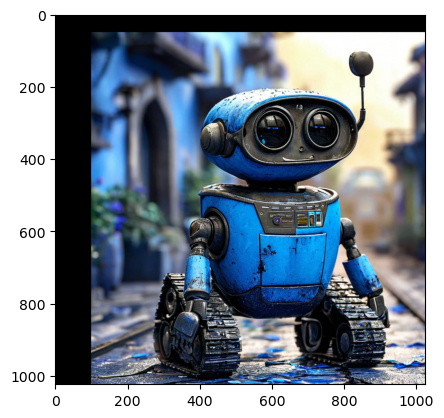

In [28]:
img = cv2.imread(IMG_PATH)
print(img.shape)
rows,cols, channels = img.shape

M = np.float32([[1,0,100], [0,1,50]])
dst = cv2.warpAffine(img, M, (cols, rows))
plt.imshow(dst)
plt.show()

`Примечание`: 3-ий аргумент у функции `cv2.warpAffine()` - это размер выходного изображения в формате **(width, height)**. Width - число столбцов, высота - число колонок

### Поворот

Поворот изображения на угол $\theta$ задаётся матрицей поворота **M** следующим образом:

\begin{equation}
M = \begin{bmatrix}
cos(\theta) & -sin(\theta)  \\
sin(\theta) & cos(\theta)  
\end{bmatrix}
\end{equation}

Однако, opencv позволяет осуществить более гибку настройку поворота путём задания координаты точки, вокруг которой будем поворачивать и коэффициента масштабирования:
\begin{equation}
M = \begin{bmatrix}
\alpha & \beta & (1-\alpha)\cdot x_{center} - \beta\cdot y_{center} \\
-\beta & \alpha & \beta \cdot x_{center} + (1-\alpha)\cdot y_{center}
\end{bmatrix}
\end{equation}

$$\alpha = scale\cdot cos(\theta)$$

$$\beta = scale \cdot sin(\theta)$$

Матрица поворта создаётся с помощью функции `cv2.getRotationMatrix2D()`. Ниже пример того, как повернуть картинку вокруг своего центра на 45 градусов c масштабом 0.7:

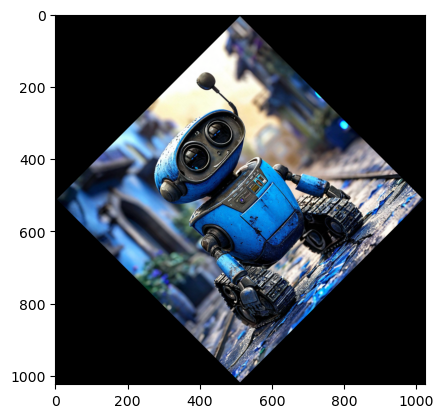

In [33]:
img = cv2.imread(IMG_PATH)
rows,cols, channels = img.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),45,0.7)
dst = cv2.warpAffine(img,M,(cols,rows))

plt.imshow(dst)
plt.show()

### Афинное преобразование

**Аффинное преобразование** — сохраняет параллельность линий, но может изменять расстояния и углы. Оно включает в себя: 
- Поворот;
- Масштабирование (увеличение/уменьшение);
- Сдвиг (shear)
- Перенос (translation)


**Принцип работы**

Чтобы вычислить матрицу преобразования, нужно задать правила, как именно должны меняться координаты. Эти правила задаются через три пары точек:

- 3 точки на исходном изображении (откуда берём пиксели).
- 3 точки на целевом изображении (куда эти пиксели должны попасть).
Программа решает систему уравнений и находит матрицу, которая наилучшим образом выполняет это преобразование.


1. Почему именно 3 точки?

Аффинное преобразование описывается матрицей 2×3:

```
[ a11 a12 b1 ]  
[ a21 a22 b2 ]  
```

Эта матрица имеет **6 неизвестных параметров** (a11, a12, b1, a21, a22, b2).

Каждая точка даёт **2 уравнения** (по одному для `x` и `y`):

```
x' = a11 * x + a12 * y + b1  
y' = a21 * x + a22 * y + b2
```

Значит, для 3 точек получаем 6 уравнений → можно однозначно найти все 6 параметров.

**На практике:**

Допустим, у нас есть исходное изображение (сдвинутый Валли), и мы хотим выровнять его.

**Шаг 1:** Выбираем 3 ключевые точки на исходном изображении (например, 3 угла наклонённого прямоугольника).

**Шаг 2:** Говорим, куда эти точки должны перейти (например, вершины ровного прямоугольника).

**Шаг 3:** OpenCV вычисляет матрицу, которая "переводит" исходные точки в целевые.

**Шаг 4:** Применяем найденное преобразование с помощью функции `cv2.warpAffine()`

**Когда использовать?**

Когда нам нужно **повернуть/масштабировать/сдвинуть** картинку без изменения перспективы:

- Выравнивание лица в фотографиях;
- Исправление наклона документа (например, сканированного текста);
- Поворот и масштабирование обёектов в компьютерном зрении


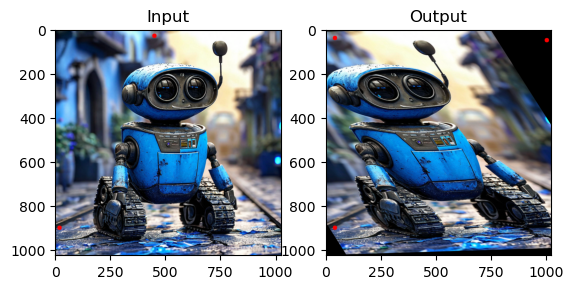

In [34]:
img = cv2.imread(IMG_PATH)
rows,cols,ch = img.shape

pts1 = np.float32([[450,30],[1200,70],[20,900]])
pts2 = np.float32([[40,40],[1000,50],[40,900]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

# нарисуем точки на исходном и итоговом изображении
# для наглядности
for pt in pts1:
    x, y = pt.astype(int)
    cv2.circle(img, (x, y), 10, (255, 0, 0), -1)  # Красный цвет, радиус 10
for pt in pts2:
    x, y = pt.astype(int)
    cv2.circle(dst, (x, y), 10, (255, 0, 0), -1)  # Красный цвет, радиус 10

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

### Перспективное преобразование

**Перспективное преобразование** (гомография) исправляет искажение перспективы, например превращает **наклонённый вид объекта** (как будто сфотографированный под углом) в его "плоский" вид сверху. Оно не сохраняет параллельность линий (например, рельсы на фото могут сходиться в одной точке).

**Принцип работы**

Исходные точки представляются в виде вектора (x,y,1) (2D + масштаб $\omega=1$). Преобразование получается путём перемножение матрицы гомографии 3x3 с вектором исходных координат:

\begin{equation}
\begin{bmatrix}
x^{'} \\
y^{'} \\
\omega^{'}
\end{bmatrix}=
\begin{bmatrix}
h_{11} & h_{12} & h_{13} \\
h_{21} & h_{22} & h_{23} \\
h_{31} & h_{32} & h_{33}
\end{bmatrix}\cdot
\begin{bmatrix}
x \\
y \\
1
\end{bmatrix}
\end{equation}

Чтобы получить итоговые координаты $(x^{''}, y^{''})$ необходимо выполнить делеение на $\omega^{'}$:

\begin{equation}
x^{''} = \frac{x^{'}}{\omega^{'}} = \frac{h_{11}x + h_{12}y + h_{13}}{h_{31}x + h_{32}y + h_{33}}
\end{equation}


\begin{equation}
y^{''} = \frac{y^{'}}{\omega^{'}} = \frac{h_{21}x + h_{22}y + h_{23}}{h_{31}x + h_{32}y + h_{33}}
\end{equation}

Здесь уже появляется нелинейность из-за деления на функцию от x и y. $h_{31}$ и $h_{32}$ отвечают за перспективные искажения. 

**На практике:**
1. Выбираем 4 угла наклонённого объекта на исходном изображении.
2. Указываем, где эти углы должны оказаться на на итоговом изображении.
​3. OpenCV вычисляет матрицу, которая "выпрямляет" перспективу
4. `warpPerspective` применяет преобразование ко всему изображению

**Когда использовать?**

Для "выпрямления" объектов, снятых под углом:
- Сканирование документов
- Дополненная реальность (AR) - наложение 3D-объектов с учётом перспективы
- Автомобильные камеры - преобразование вида сверху для парковки
- Панорамная склейка фотографий

(<Axes: title={'center': 'Output'}>,
 Text(0.5, 1.0, 'Output'))

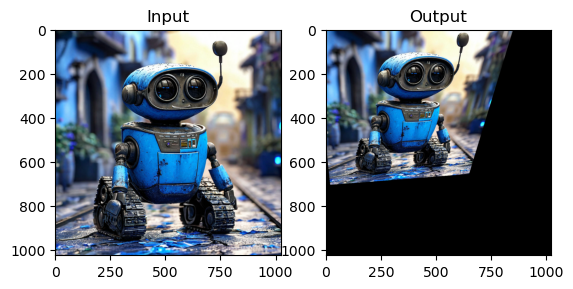

In [35]:
img = cv2.imread(IMG_PATH)
rows,cols,ch = img.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(cols,rows))
plt.subplot(121), plt.imshow(img), plt.title('Input')
plt.subplot(122), plt.imshow(dst), plt.title('Output')

Отличие афииного преобразования от преобразования перспективы:

<img src="https://gaussian37.github.io/assets/img/vision/concept/image_transformation/10.png" width="550" align="center">

## Построение гистограмм

Гистрограмма - график, отображающий распредление `интенсивности` на изображении. Показывает нам частоту встречаемости 
пикселей с определённым значением интенсивности. 

**Основные термины:**

- `BINS` - число интервалов, на которые разбиваем отрезки интенсивности

- `RANGE` - промежуток значений интенсивности, для которых хотим построить гистрамму.


**Синтаксис:**
```
cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
```

1. `images` - исходное изображение типа uint8 или float32. Задаём в квадратных скобках [img]
2. `channels` - чило каналов, также указываем в квадратных скобках. Для GrayScale - [0]. Для RGB указываем [0], [1] или [2]
3. `mask` - по умолчанию параметр принимает значение None, и отображается полное изображение. Ненулевая маска позволяет
построить гистрограмму для определённого участка изображения.
4. `histSize` - число бинов (**BINS**). По умолчанию [256]
5. `ranges` - промежуток значений интенсивности (**RANGE**). По умолчанию [0,256]



Строим гистрограмму для изображения в оттенках серого:

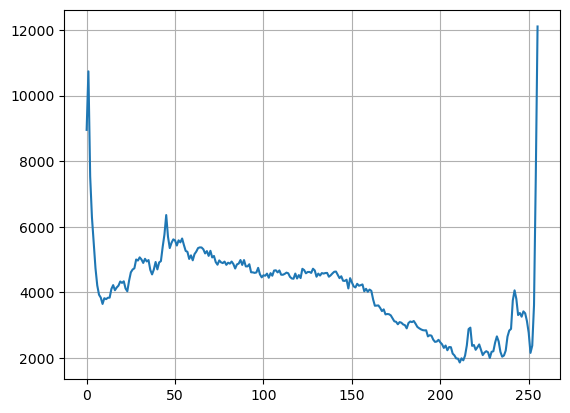

In [36]:
img = cv2.imread(IMG_PATH, cv2.IMREAD_GRAYSCALE)

hist = cv2.calcHist(images=[img], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist)
plt.grid()
plt.show()

Строим гистрограммы по каждому из 3-ёх каналов:

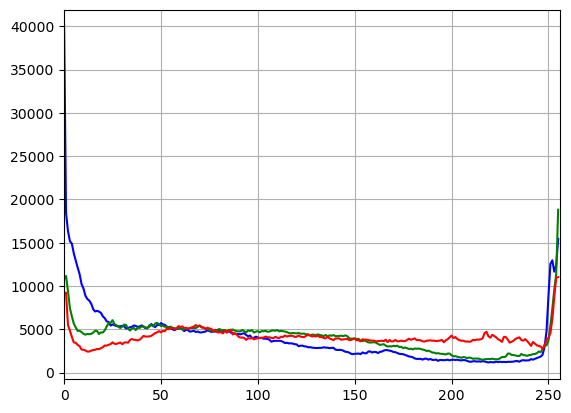

In [37]:
img = cv2.imread(IMG_PATH)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.grid()
plt.show()

In [ ]:
Построим гистрограмму для определённой части изображения:

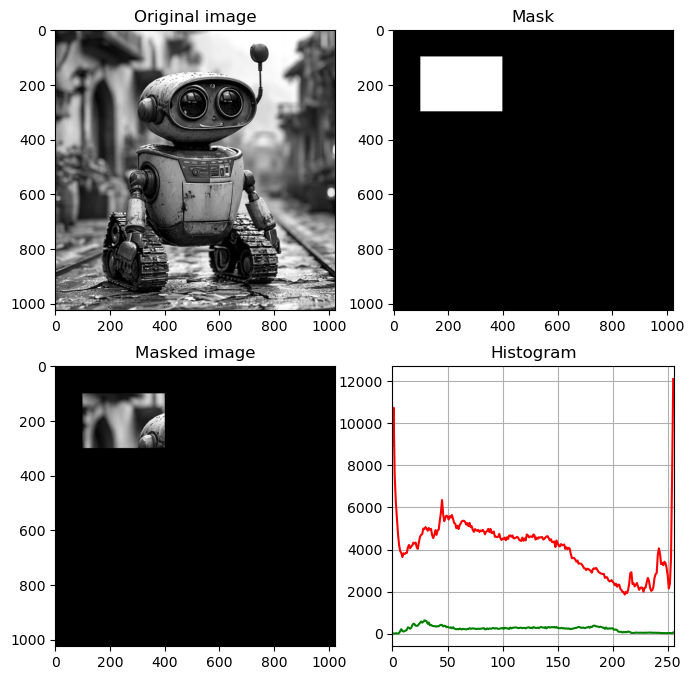

In [38]:
img = cv2.imread(IMG_PATH,0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.figure(figsize=(8,8))
plt.subplot(221), plt.imshow(img, 'gray'), plt.title("Original image")
plt.subplot(222), plt.imshow(mask,'gray'), plt.title("Mask")
plt.subplot(223), plt.imshow(masked_img, 'gray'), plt.title("Masked image")
plt.subplot(224), plt.plot(hist_full, c='r'), plt.plot(hist_mask, c='g'), plt.title("Histogram")
plt.xlim([0,256])
plt.grid()
plt.show()

### Гистрограммное выравнивание (Histogram Equalization)

<img src="https://cvexplained.wordpress.com/wp-content/uploads/2020/08/image-47.png" width="300" align="center">

**Цель:** улучшить контраст изображения, перераспределив интенсивности пикселей так, чтобы гистограмма стала более равномерной. 
Основные шаги

**Основные шаги:**
1. `Построение гистрограммы`:
Подсчитывается количество пикселей для каждого значения яркости (0-255 для 8-битного изображения)
2. `Расчёт кумулятивной функции распределения (CDF)`:

\begin{equation}
CDF(k)= \displaystyle\sum_{i=0}^{k} \frac{h(i)}{N}
\end{equation}
где 

* **N** - общее число пикселей,
* **h(i)** - количество пикселей с яркостью *i*,
* **CDK(k)** - вероятность того, что пиксель имеет яркость $\leq k$

4. `Нормализация и преобразования яркостей`:
Новое значение пикселя:

\begin{equation}
I_{new}(x,y) = round(CDF(I_{old}(x,y)))\times(L-1))
\end{equation}
где L - максимальная яркость (например, 255 для 8-битного изображения)

В результате гистрограмма становится более равномерной, улучшается контраст.

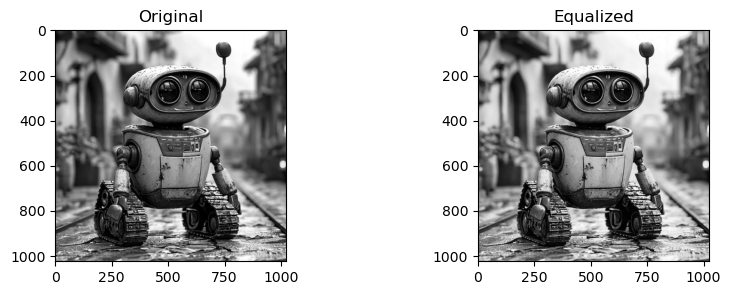

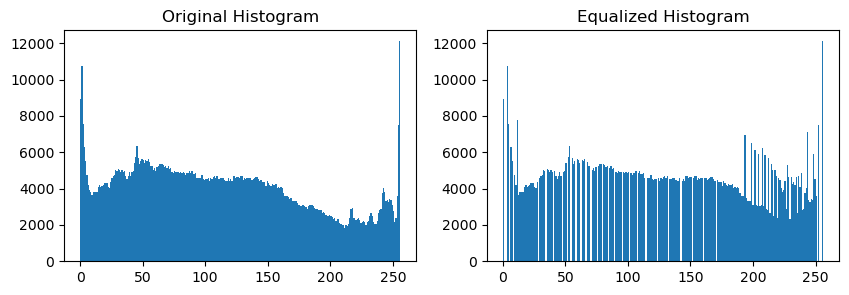

In [39]:
img = cv2.imread(IMG_PATH, cv2.IMREAD_GRAYSCALE)

# Применение гистограммного выравнивания
equalized_img = cv2.equalizeHist(img)

# Визуализация
plt.figure(figsize=(10, 3))
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(equalized_img, cmap='gray'), plt.title('Equalized')
plt.show()

# Гистограммы
plt.figure(figsize=(10, 3))
plt.subplot(121), plt.hist(img.ravel(), 256, [0, 256]), plt.title('Original Histogram')
plt.subplot(122), plt.hist(equalized_img.ravel(), 256, [0, 256]), plt.title('Equalized Histogram')
plt.show()

## Преобразование Фурье

Преобразование Фурье раскладывает сигнал (включая изображения) на суперпозицию синусоидальных волн разной частоты. Для изображений это позволяет перейти из пространственной области (пиксели) в частотную область (спект частот)

**Ключевые понятия**:

1. **Пространственная vs Частотная область**:
   * Пространственная: изображение как матрица яркостей пикселей
   * Частотная: изображение как сумма волн разной частоты (низкие - плавные изменения, высокие - резкие границы/шум)
2. **Формула дискретного преобразования Фурье (Discrete Fourier Transform, DFT)**:
Для изображения размером $M\times N$:

\begin{equation}
F(u,v) = \sum_{x=0}^{M-1}\sum_{y=0}^{N-1}f(x,y)\cdot e^{-2\pi i\left ( \frac{ux}{M}+\frac{vy}{N}\right)}
\end{equation}

`f(x,y)` - яркость пикселя в точке **(x,y)**

`F(u,v)` - комплексный спект в частотной области

3. Низкие и высокие частоты
   * Низкие частоты - гладкие области изображений, содержат общую форму изображения (фон, крупные объекты)
   * Высокие частоты: содержат детали изобажения и шум (резкие переходы, края)
  
**Зачем это нужно?**
1. **Фильтрация частот**
   * Удаление шума (подавление высоких частот)
   * Улучшение резкости (усиление высоких частот)

2. **Анализ текстур** (выделение периодических структур, например ткань, решётки)
3. **Свёртка в частотной области** (ускорение операций)


**Основная идея**
1. Прямое преобразование Фурье (FFT) переводит изображение из пространственной области в частотную
2. Фильтрация - мы можем модифицировать частоты:
   - удалить высокие (сгладить изображение)
   - удалить низкие (усилить границы)
3. Обратное преобразование (IFFT) возвращает изображение обратно в пространственный домен


FFT dtype:complex128


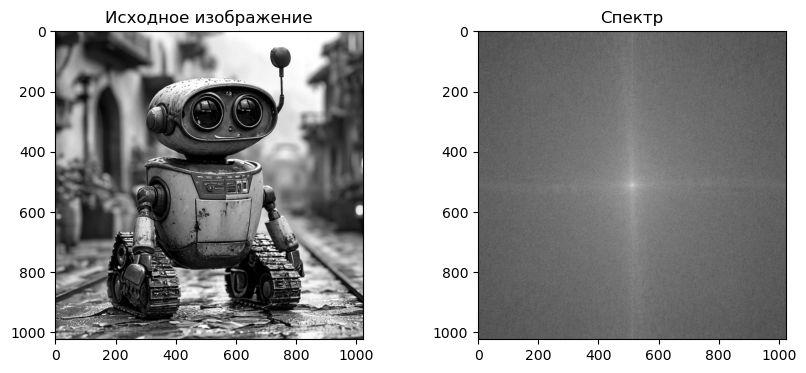

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображения в оттенках серого
img = cv2.imread(IMG_PATH, cv2.IMREAD_GRAYSCALE)

# Преобразование Фурье
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)  # Сдвиг, чтобы низкие частоты были по центру
print(f'FFT dtype:{fshift.dtype}')

# Амплитудный спектр (логарифм — для визуализации)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

# Показываем
plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.imshow(img, cmap='gray'), plt.title('Исходное изображение')
plt.subplot(1,2,2), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title('Спектр')
plt.show()

После DFT и сдвига спекта низкие частоты оказываются в центре изображения, а высокие - по краям

**Low-pass filter** - подавление высоких частот (размытие)

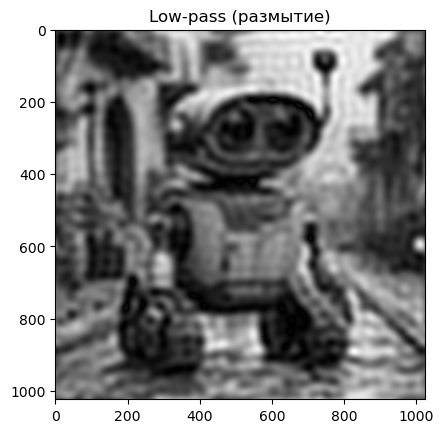

In [21]:
rows, cols = img.shape
crow, ccol = rows//2 , cols//2

# Создаем маску: 1 внутри круга, 0 снаружи
mask = np.zeros((rows, cols), np.uint8)
r = 30  # радиус пропускаемой низкой частоты
cv2.circle(mask, (ccol, crow), r, 1, thickness=-1)

# Применяем маску
fshift_lp = fshift * mask
f_ishift = np.fft.ifftshift(fshift_lp)
img_lp = np.fft.ifft2(f_ishift)
img_lp = np.abs(img_lp)

plt.imshow(img_lp, cmap='gray')
plt.title('Low-pass (размытие)')
plt.show()

**High-pass filter** - подавление высоких частот (усиление краёв)

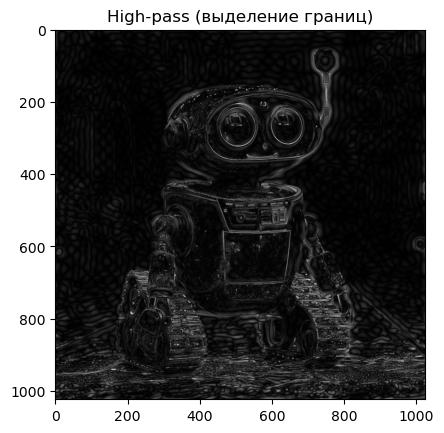

In [22]:
# Инвертируем low-pass маску — получаем high-pass
mask_hp = 1 - mask
fshift_hp = fshift * mask_hp
f_ishift = np.fft.ifftshift(fshift_hp)
img_hp = np.fft.ifft2(f_ishift)
img_hp = np.abs(img_hp)

plt.imshow(img_hp, cmap='gray')
plt.title('High-pass (выделение границ)')
plt.show()

## Нахождение контуров

### Основные этапы нахождения контуров:
1. Подготовка изображения
   - для обнаружения контуров требуется бинарное изображение
   - обычно используется метод пороговой фильтрации или алгоритм Canny для предварительной обработки

   `_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)`
2. Нахождение контуров
   - Функция cv2.findContours анализирует бинарное изображение и выделяет его контуры.
   - Основной синтаксис:
   `contours, hierarchy = cv2.findContours(image, mode, method)`
        - **image** - подаваемое на вход изображение
        - **mode** - способ организации контуров
        - **method** - алгоритм аппроксимации контуров

### Параметры функции cv2.findContours

1. Режимы поиска конутров(mode)
- **cv2.RETR_EXTERNAL**: Извлекает только внешние контуры.
- **cv2.RETR_LIST**: Извлекает все контуры без организации иерархии.
- **cv2.RETR_TREE**: Извлекает все контуры с полным построением иерархии.
- **cv2.RETR_CCOMP**: Извлекает контуры в виде двухуровневой иерархии.

2. Методы аппроксимации 
- **cv2.CHAIN_APPROX_NONE**: Сохраняет все точки контура.
- **cv2.CHAIN_APPROX_SIMPLE**: Упрощает контур, сохраняя только крайние точки.

### Выходное значение
- `Contours`: Список всех обнаруженных контуров, где каждый контур представлен массивом координат точек.
- `Hierarchy`: Информация об иерархии контуров. Полезно для анализа вложенных объектов.

### Рисование контуров
Для отображения найденных контуров используется функция `cv2.drawContours`:

`cv2.drawContours(image, contours, contourIdx, color, thickness)`

- `image`: Изображение, на котором рисуются контуры.
- `contours`: Найденные контуры
- `contourIdx`: Индекс конкретного контура для отображения (или -1 для всех контуров)
- `color`: Цвет линий
- `thickness`: Толщина линий


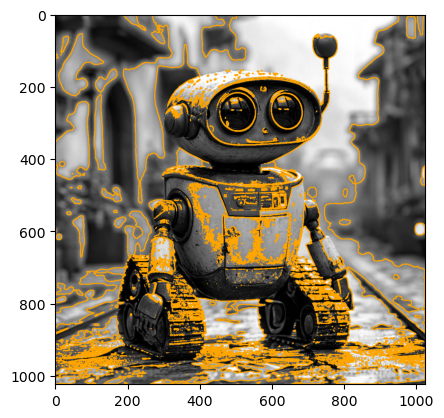

In [41]:
# Загрузка изображения в градациях серого
image = cv2.imread(IMG_PATH, cv2.IMREAD_GRAYSCALE)

# Применение пороговой обработки
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Нахождение контуров
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Рисование контуров
output = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Перевод в цветное для отображения
cv2.drawContours(output, contours, -1, (255, 165, 0), 2)

cv2.imwrite('images/valle_contours.jpg', output)
plt.imshow(output)
plt.show()

In [24]:
print(f'Всего на картинке {len(contours)} контура')
print(f'Можем также обратиться к отдельному контуру изображения по индексу: contours[idx]')
print(f'Размер 6-контура: {contours[5].shape}')

Всего на картинке 3084 контура
Можем также обратиться к отдельному контуру изображения по индексу: contours[idx]
Размер 6-контура: (40, 1, 2)


Также есть приложу пару полезных функций для работы с контурами: 

1. **Площадь контуров**:

`area = cv2.contourArea(contour)`

2. **Пеример контуров**:

`perimeter = cv2.arcLength(contour, closed=True)`

3. **Прямоугольник вокруг контура**:

`x, y, w, h = cv2.boundingRect(contour)`

4. **Огибающий круг**:

`(x, y), radius = cv2.minEnclosingCircle(contour)`

5. **Моменты**:

`m = cv2.moments(contour)`

`Примечание`: **Моменты изображений** — это числовые характеристики формы объекта на изображении, вычисляемые на основе распределения пикселей. Они широко используются в компьютерном зрении для анализа геометрии объектов, таких как площадь, центр масс, ориентация и другие свойства.

Например, зная сумму координат по Ox и по Oy для контура/объекта, а также его площадь мы можем вычислить центр масс:

\begin{equation}
x_{c} = \frac{m_{10}}{m_{00}},  y_{c} = \frac{m_{01}}{m_{00}}
\end{equation}

In [46]:
idx = 5
print(f'Площадь {idx-1}-ого контура: {cv2.contourArea(contours[idx])}')
print(f'Периметр {idx-1}-ого контура: {cv2.arcLength(contours[idx], closed=True) }')
print(f'Прямоугольник вокруг {idx-1}-ого контура: {cv2.boundingRect(contours[idx])}')
print(f'Огибающий круг {idx-1}-ого контура: {cv2.minEnclosingCircle(contours[idx])}\n')

moments = cv2.moments(contours[idx])
print("m00 =", moments["m00"])  # Площадь
print("m10 =", moments["m10"], "m01 =", moments["m01"])  # Суммы координат
print("mu20 =", moments["mu20"])  # Центральный момент


Площадь 4-ого контура: 422.5
Периметр 4-ого контура: 138.5269113779068
Прямоугольник вокруг 4-ого контура: (264, 1012, 59, 12)
Огибающий круг 4-ого контура: ((293.0, 1019.5), 29.210542678833008)

m00 = 422.5
m10 = 125918.33333333333 m01 = 430338.1666666666
mu20 = 82936.1625575316
